<table>
  <tr>
    <td style="text-align: center;">
      <img src="https://www.ufpi.br/images/ufpi-icone1.png" alt="UFPI Logo" style="width: 100px; height: auto;">
    </td>
    <td style="text-align: left;">
      <h3>Universidade Federal do Piauí - UFPI</h3>
      <h3>Departamento de Computação/CNN</h3>
      <h3>Trabalho da Disciplina de Aprendizado de Máquina</h3>
      <h3>Professor: Vinicius Ponte Machado</h3>
    </td>
  </tr>
</table>

**Alunos**: Marcelo Pontes e Marcelo Rego  
**Objetivo**: realizar estudos de Árvore de Decisão utilizando o banco de dados de diagnóstico de câncer de mama de Wisconsin  
**Repositório**: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

# **Introdução**

<p style='text-align: justify;'>
O propósito da pesquisa foi criar um modelo para o diagnóstico do câncer de mama, utilizando características nucleares obtidas a partir de imagens digitalizadas por meio de aspiração por agulha fina (FNA, do inglês, Fine Needle Aspirations). O desenvolvimento desse conjunto de dados tinha como objetivo oferecer uma base de dados confiável e padronizada, destinada a apoiar investigações em aprendizado de máquina e análises preditivas na medicina. As informações foram coletadas no Clinical Sciences Center da Universidade de Wisconsin.  As coletas ocorreram durante o início da década de 1990, sendo a primeira publicação relevante sobre os dados apresentada em 1993. O desenvolvimento e refinamento do dataset continuaram até aproximadamente 1995, quando ele foi disponibilizado no UCI Machine Learning Repository, onde continua sendo amplamente utilizado para pesquisas em aprendizado de máquina e análise médica.
</p>

# **Metodologia**
<p style='text-align: justify;'>
O estudo foi conduzido de forma abrangente, revisitando cada etapa várias vezes para avaliar, ajustar e validar as hipóteses propostas. Em cada iteração para efeito de comparação o tamanho do conjunto de testes é o mesmo de 30%, foram realizadas análises cuidadosas para determinar a aceitação ou rejeição das hipóteses:
</p>
<p style='text-align: justify;'>
Após uma análise aprofundada dos dados, formulamos algumas hipóteses e justificativas:
(i) Redução de dimensionalidade: algumas variáveis foram excluídas por apresentarem alta correlação com outras que permaneceram, conforme verificado na matriz de correlação;
(ii) Retirada de outliers: utilizando a métrica de Mahalanobis;
(iii) Normalização dos dados e escalonamento.
Realizamos diversas rodadas de teste para avaliar as hipóteses propostas, ajustando parâmetros como a proporção do conjunto de teste (variando entre 10% e 40%, em incrementos de 5%) e critérios de avaliação como entropia e índice de Gini. Cada ajuste visava otimizar as métricas de desempenho e determinar a configuração mais eficaz.
</p>

## **Carregar o dataset**

In [33]:
# conectar o Google Colab no Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [34]:
# atribuir a uma variável o caminho do arquivo
file_path = 'breast-cancer-wisconsin.csv'

## **Importar as bibliotecas**

In [35]:
#!pip install --upgrade pandas

In [36]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis

## **Pré-processamento e atribuição de variáveis**

In [37]:
# Transformar os dados em um Dataframe
df = pd.read_csv(file_path)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [38]:
# Exibir o DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Resumo estatístico das colunas numéricas**

In [39]:
# Informações gerais
#df.info()
info_df = pd.DataFrame({
    'Nome da Coluna': df.columns,
    'Tipo': [df[col].dtype for col in df.columns],
    'Não Nulos': [df[col].notnull().sum() for col in df.columns],
    'Total': [df[col].size for col in df.columns]
})

# Apresentar o DataFrame
display(info_df.style.set_properties(**{'text-align': 'center'}))

,Nome da Coluna,Tipo,Não Nulos,Total
0,id,int64,569,569
1,diagnosis,object,569,569
2,radius_mean,float64,569,569
3,texture_mean,float64,569,569
4,perimeter_mean,float64,569,569
5,area_mean,float64,569,569
6,smoothness_mean,float64,569,569
7,compactness_mean,float64,569,569
8,concavity_mean,float64,569,569
9,concave points_mean,float64,569,569


In [40]:
# Resumo estatístico das colunas numéricas
# df.describe()
# Gerar a descrição
description = df.describe()

# Adicionar uma coluna com a descrição das métricas
description['Metric'] = description.index

# Reorganizar as colunas
description = description[['Metric'] + [col for col in description.columns if col != 'Metric']]

# Estilizar a tabela
styled_description = description.style \
    .set_properties(**{'text-align': 'center'}) \
    .highlight_max(color='lightgreen', axis=0) \
    .highlight_min(color='salmon', axis=0) \
    .set_table_attributes('style="font-size: 14px;"')

# Exibir a tabela estilizada
display(styled_description)

,Metric,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,min,8670.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,25%,869218.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,50%,906024.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,75%,8813129.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,max,911320502.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
# remover o id do dataset
df_menos_id = df.drop('id', axis=1)

# Converter 'M' para 1 e 'B' para 0
df_menos_id['diagnosis'] = df_menos_id['diagnosis'].map({'M': 1, 'B': 0})

# gerar dados estatísticos
for coluna in df_menos_id.columns:
  print(f'Variável: {coluna}')
  print(f' - Média: {df_menos_id[coluna].mean()}')
  print(f' - Desvio padrão: {df_menos_id[coluna].std()}')
  print(f' - Coeficiente de variação: {df_menos_id[coluna].std()/df_menos_id[coluna].mean()}' )
  print('----------------------------------------------')

Variável: diagnosis
 - Média: 0.37258347978910367
 - Desvio padrão: 0.4839179564031686
 - Coeficiente de variação: 1.298817533931146
----------------------------------------------
Variável: radius_mean
 - Média: 14.127291739894552
 - Desvio padrão: 3.524048826212078
 - Coeficiente de variação: 0.24944970990160792
----------------------------------------------
Variável: texture_mean
 - Média: 19.289648506151142
 - Desvio padrão: 4.301035768166949
 - Coeficiente de variação: 0.22297118409365635
----------------------------------------------
Variável: perimeter_mean
 - Média: 91.96903339191564
 - Desvio padrão: 24.2989810387549
 - Coeficiente de variação: 0.26420828992740997
----------------------------------------------
Variável: area_mean
 - Média: 654.8891036906855
 - Desvio padrão: 351.9141291816527
 - Coeficiente de variação: 0.537364459415204
----------------------------------------------
Variável: smoothness_mean
 - Média: 0.0963602811950791
 - Desvio padrão: 0.014064128137673616
 

In [42]:
import pandas as pd

# Converter 'M' para 1 e 'B' para 0
df_menos_id = df.drop('id', axis=1)
df_menos_id['diagnosis'] = df_menos_id['diagnosis'].map({'M': 1, 'B': 0})

# Criar listas para armazenar as métricas
variaveis = []
medias = []
desvios_padrao = []
coeficientes_variacao = []

# Calcular as métricas e armazenar nas listas
for coluna in df_menos_id.columns:
    variaveis.append(coluna)
    medias.append(df_menos_id[coluna].mean())
    desvios_padrao.append(df_menos_id[coluna].std())
    coeficientes_variacao.append(df_menos_id[coluna].std() / df_menos_id[coluna].mean())

# Criar um DataFrame com as métricas
df_metricas = pd.DataFrame({
    'Variável': variaveis,
    'Média': medias,
    'Desvio Padrão': desvios_padrao,
    'Coeficiente de Variação': coeficientes_variacao
})

# Estilizar o DataFrame
styled_table = df_metricas.style \
    .background_gradient(subset=['Média'], cmap='Blues') \
    .background_gradient(subset=['Desvio Padrão'], cmap='Greens') \
    .background_gradient(subset=['Coeficiente de Variação'], cmap='Reds') \
    .highlight_max(subset=['Média', 'Desvio Padrão', 'Coeficiente de Variação'], color='lightblue') \
    .highlight_min(subset=['Média', 'Desvio Padrão', 'Coeficiente de Variação'], color='lightgreen')

# Exibir a tabela estilizada
styled_table

,Variável,Média,Desvio Padrão,Coeficiente de Variação
0,diagnosis,0.372583,0.483918,1.298818
1,radius_mean,14.127292,3.524049,0.249450
2,texture_mean,19.289649,4.301036,0.222971
3,perimeter_mean,91.969033,24.298981,0.264208
4,area_mean,654.889104,351.914129,0.537364
5,smoothness_mean,0.096360,0.014064,0.145954
6,compactness_mean,0.104341,0.052813,0.506155
7,concavity_mean,0.088799,0.079720,0.897753
8,concave points_mean,0.048919,0.038803,0.793204
9,symmetry_mean,0.181162,0.027414,0.151325


### **Visualização básica das distribuições e possíveis outliers**

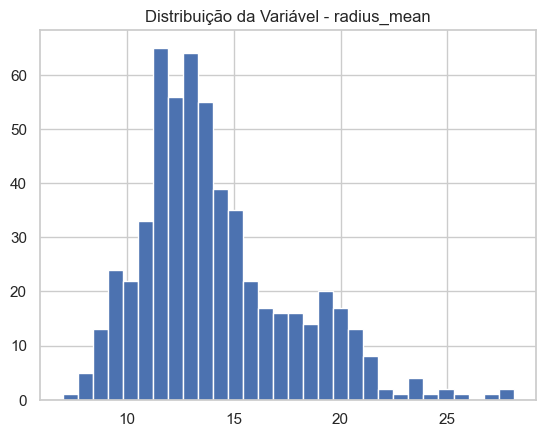

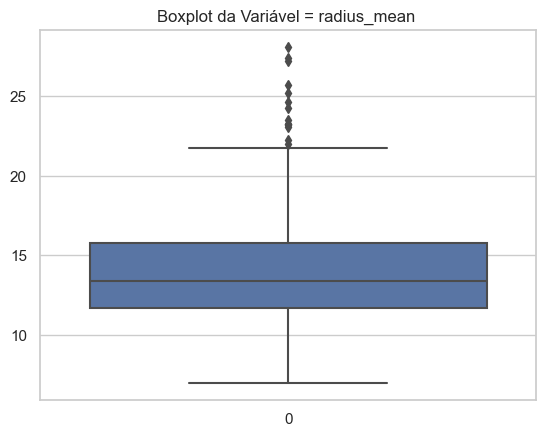

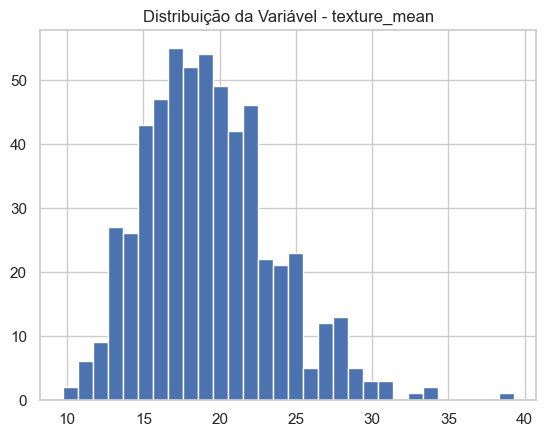

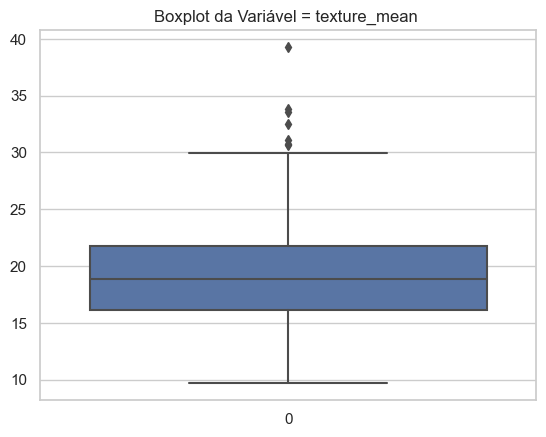

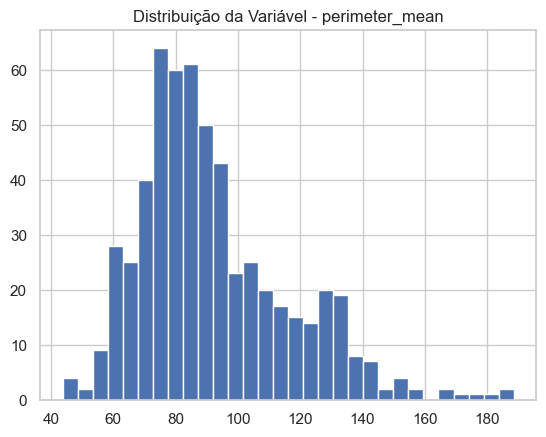

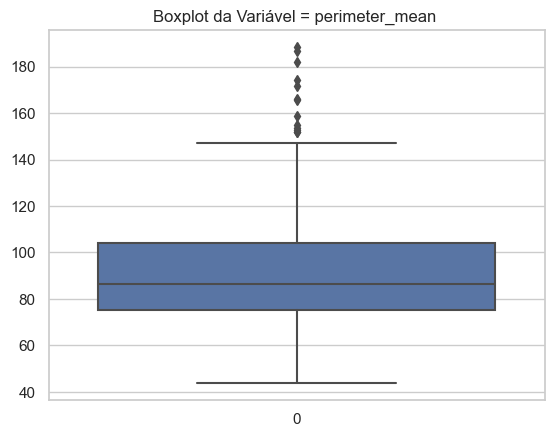

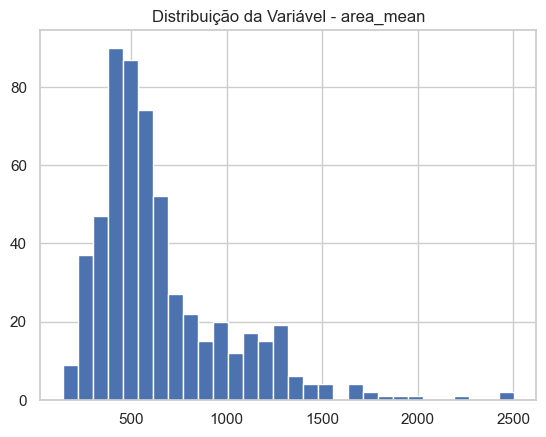

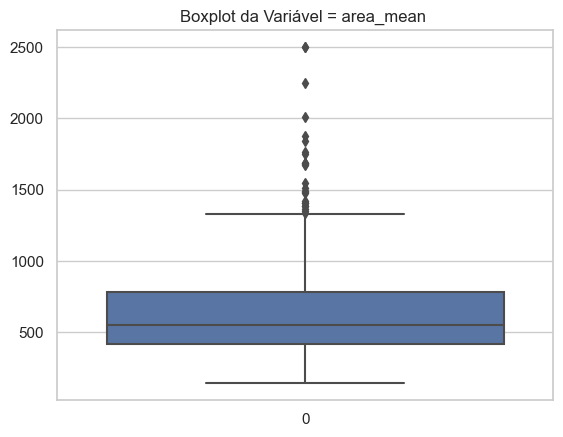

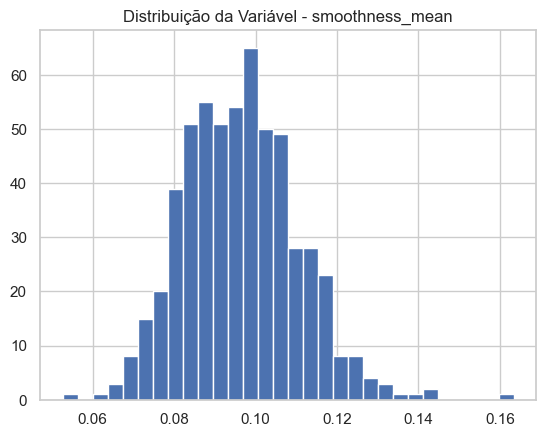

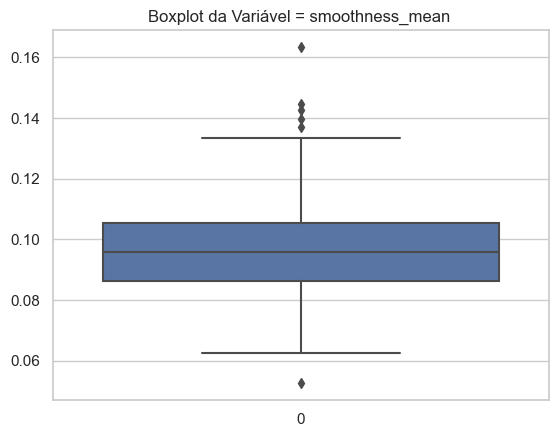

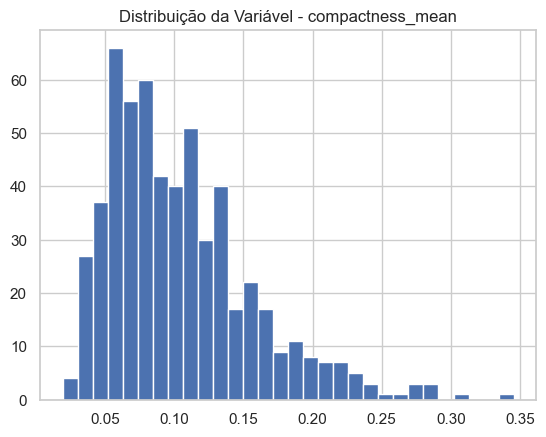

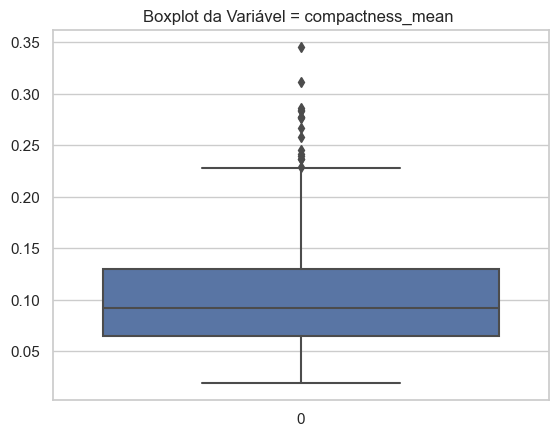

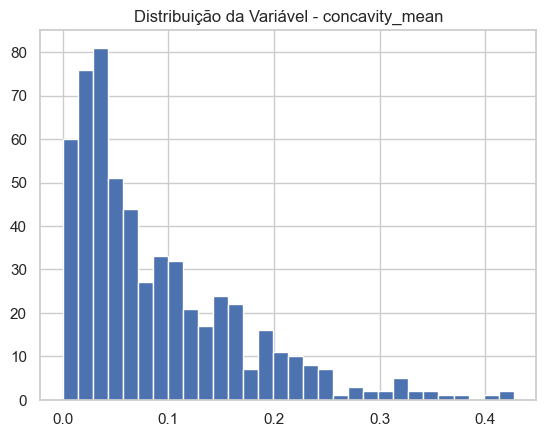

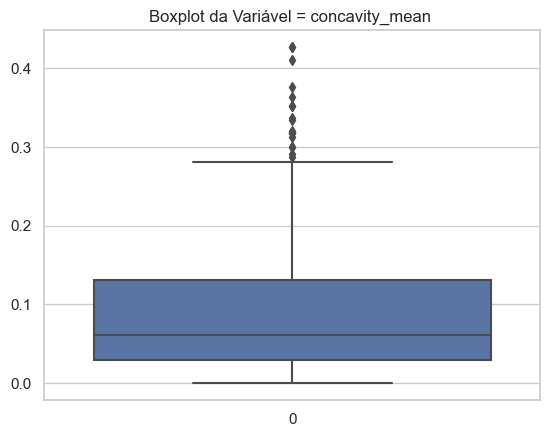

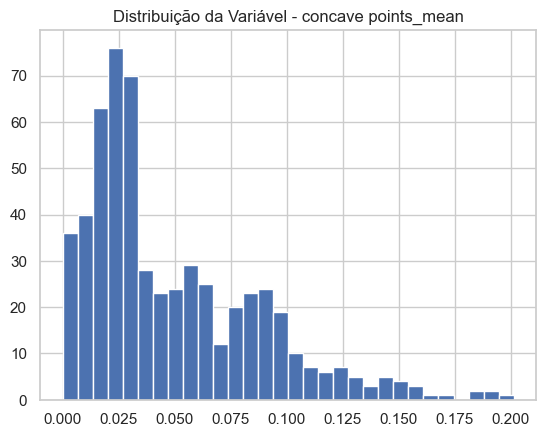

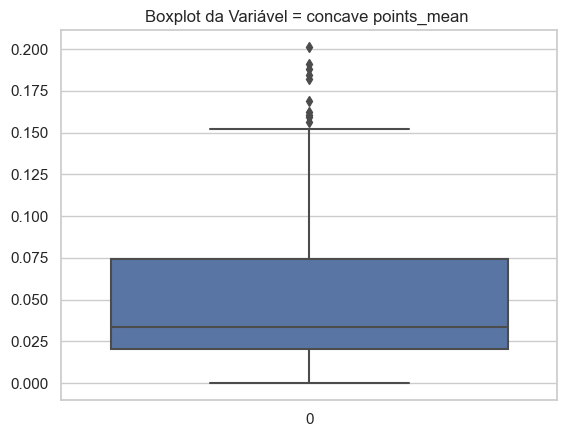

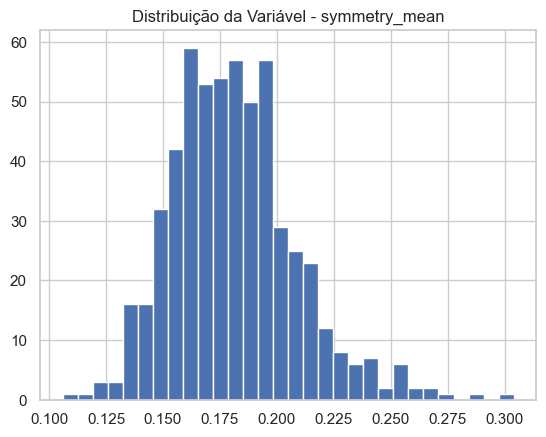

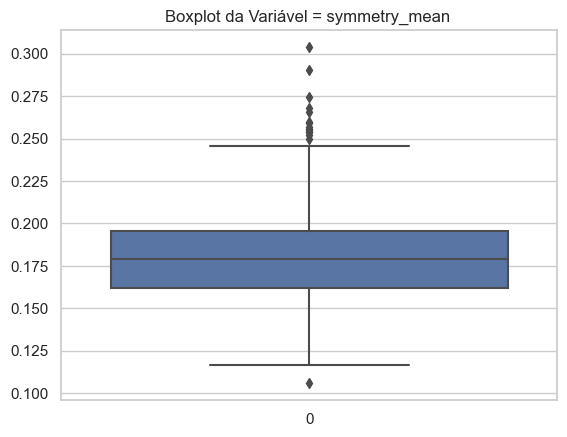

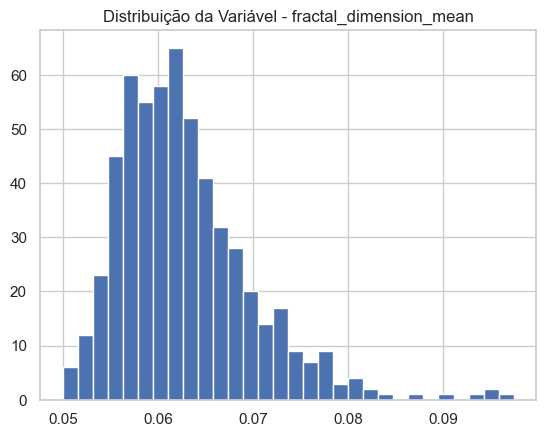

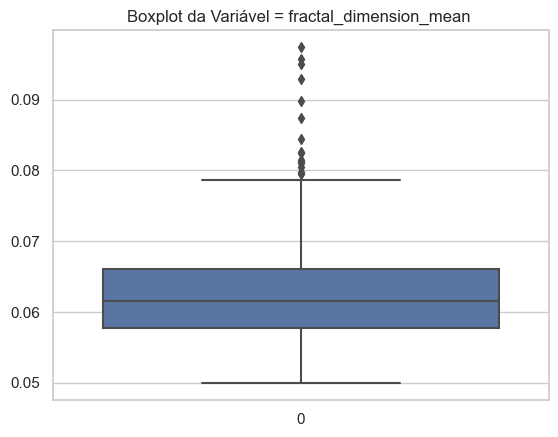

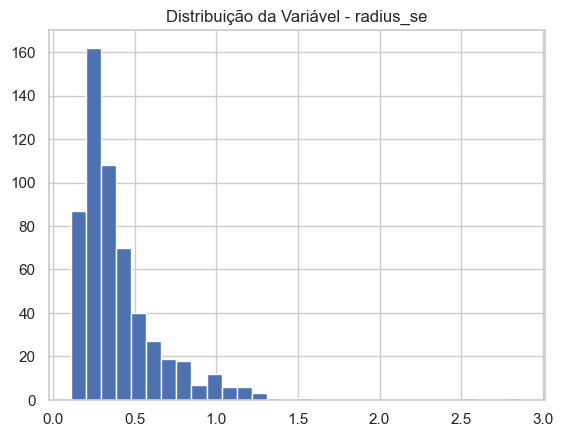

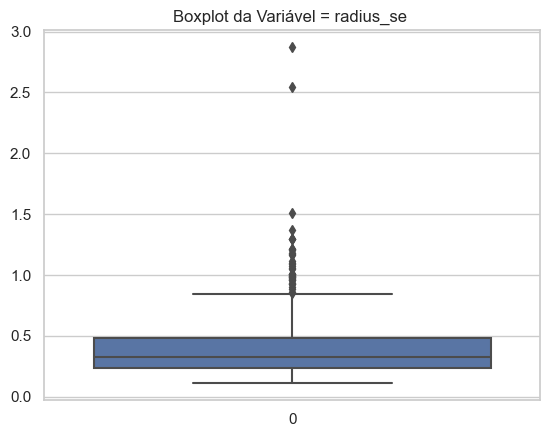

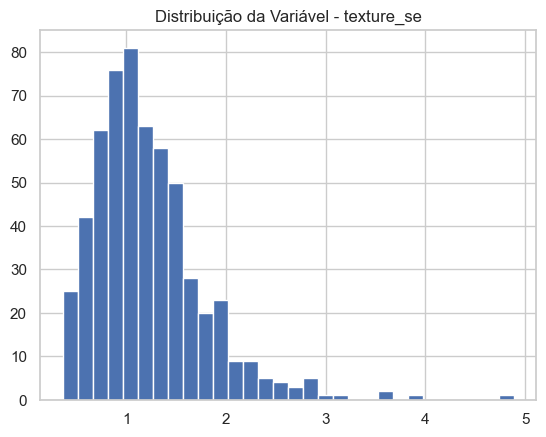

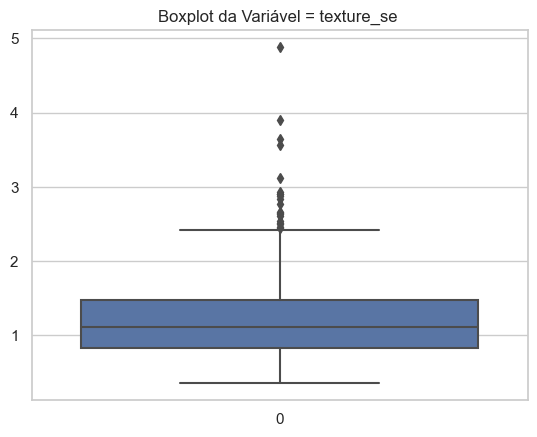

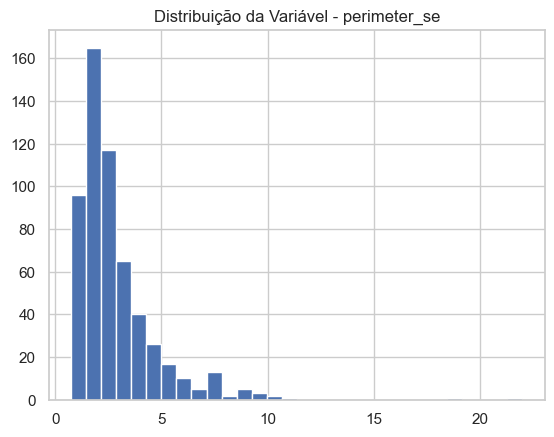

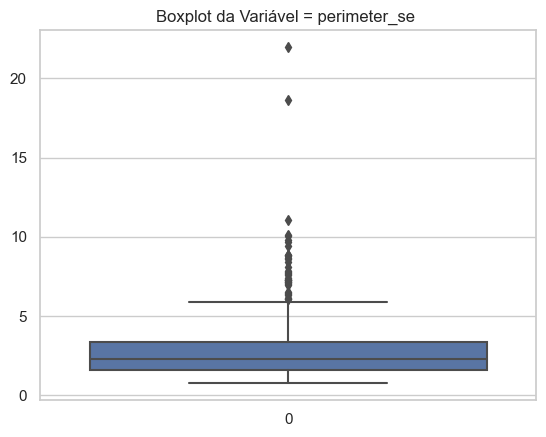

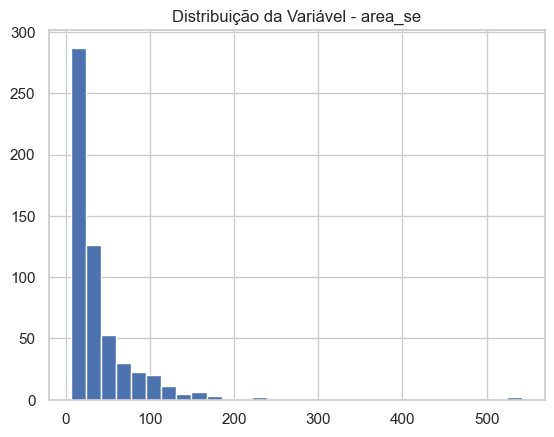

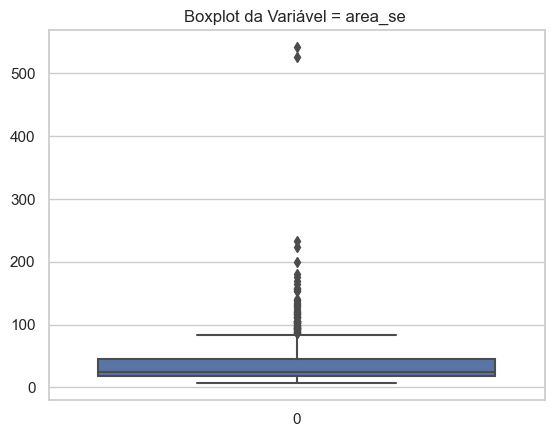

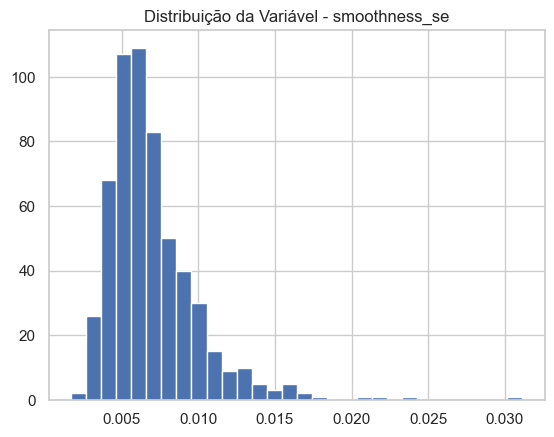

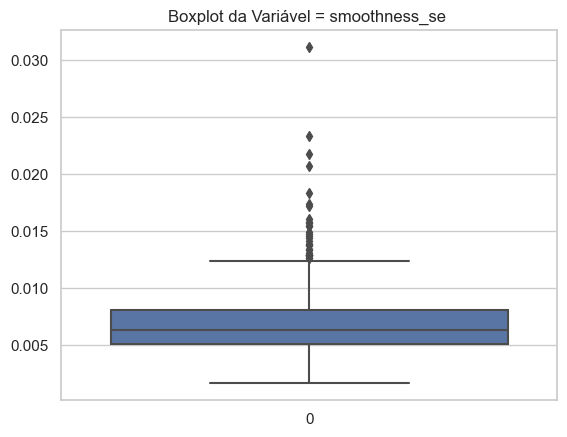

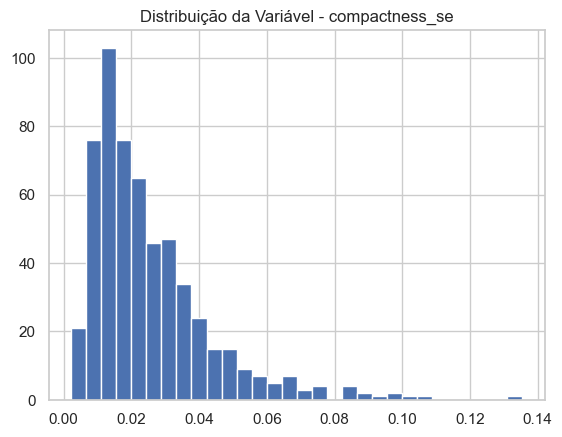

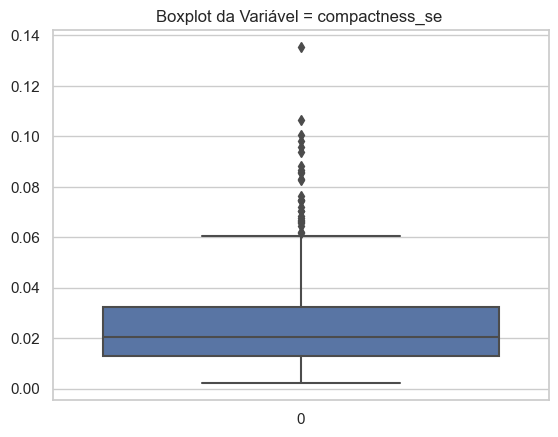

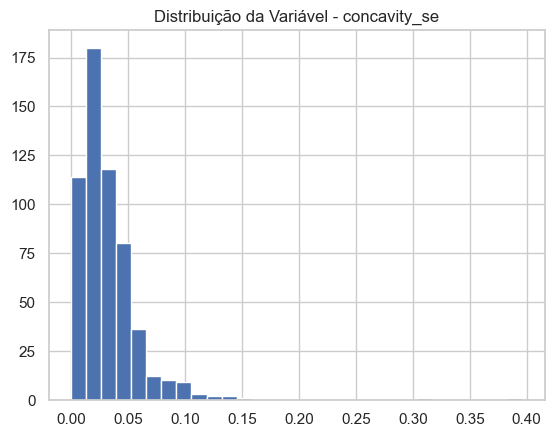

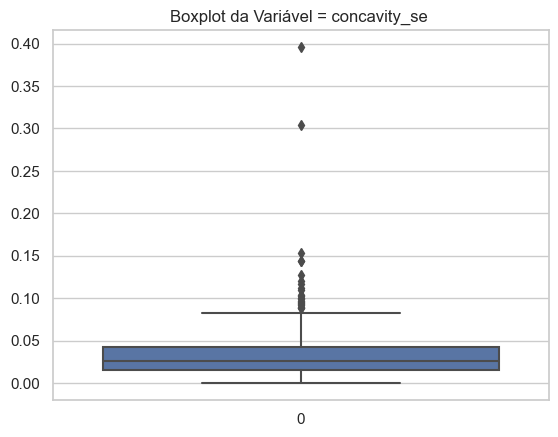

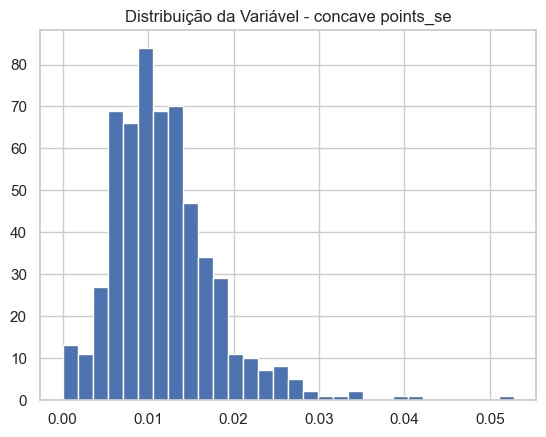

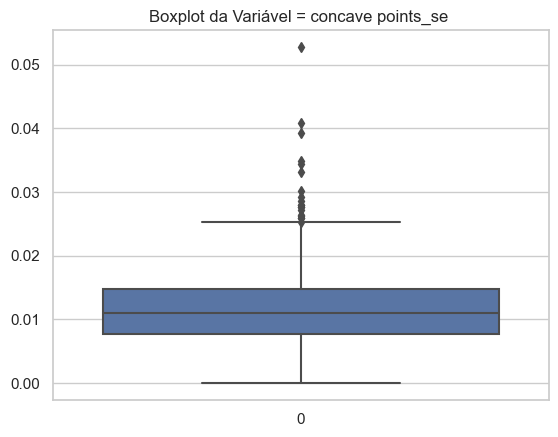

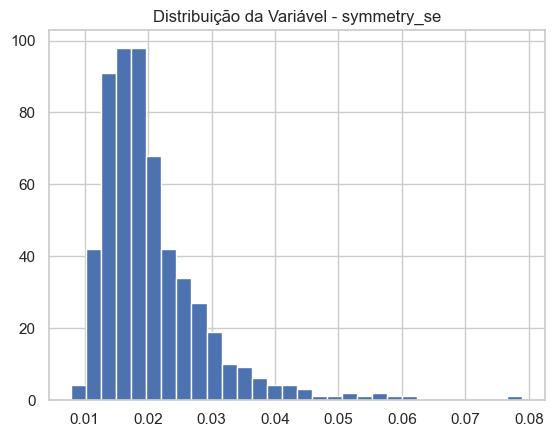

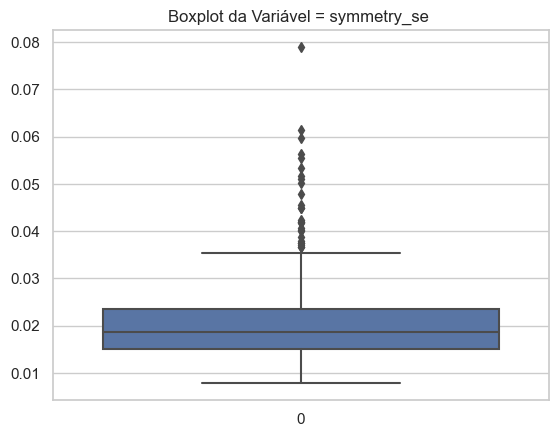

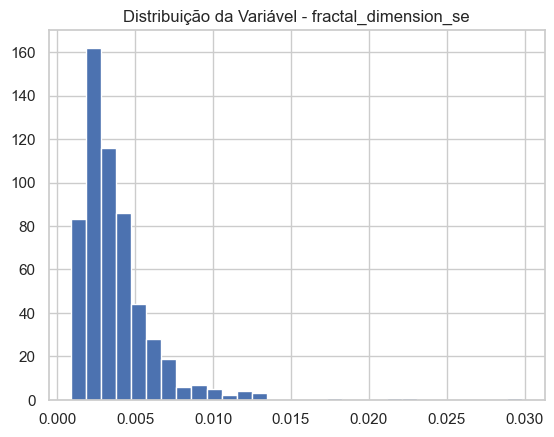

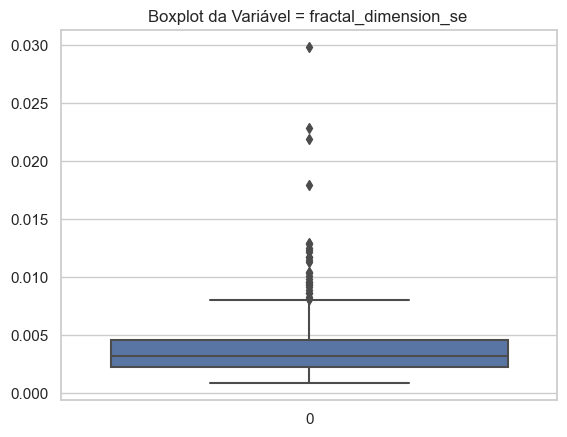

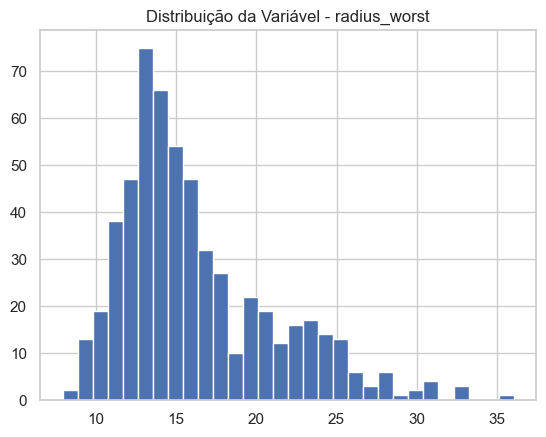

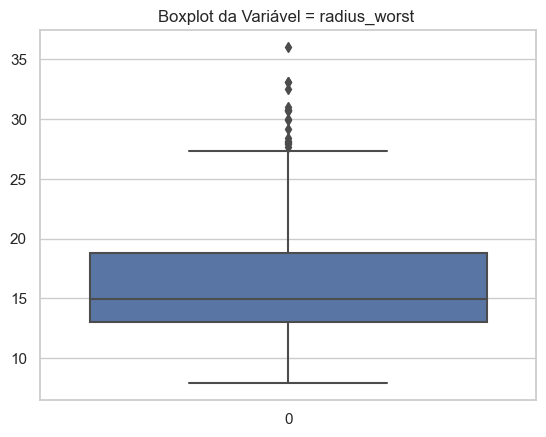

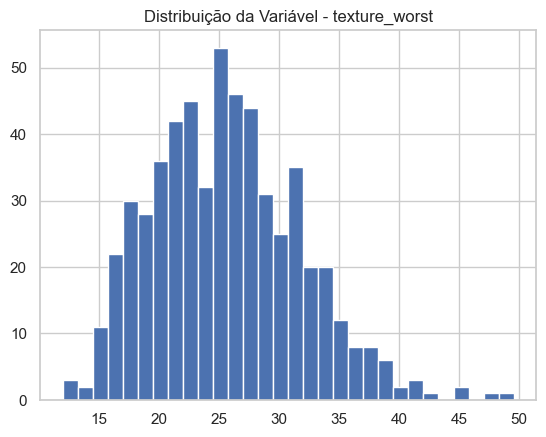

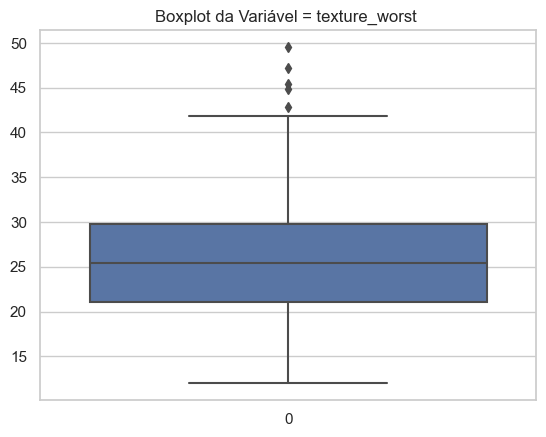

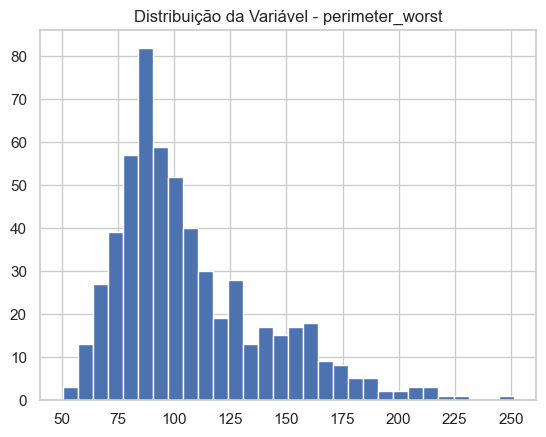

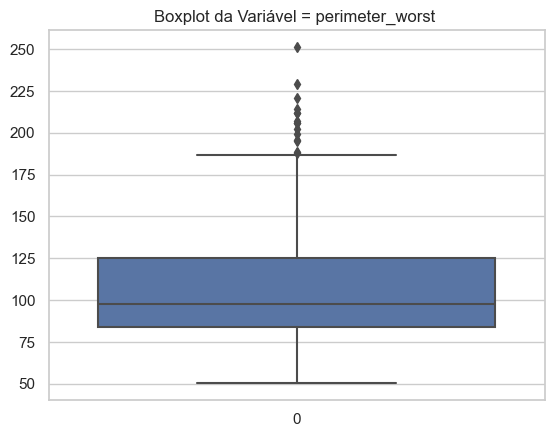

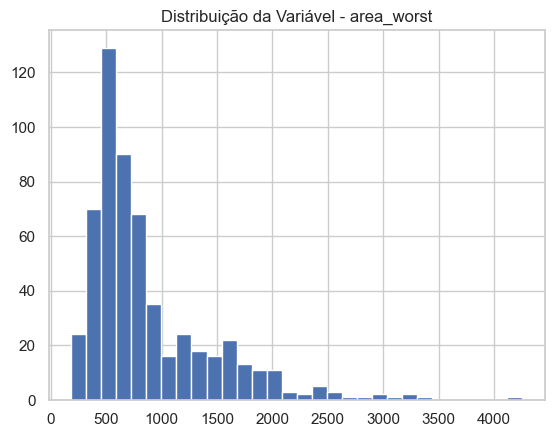

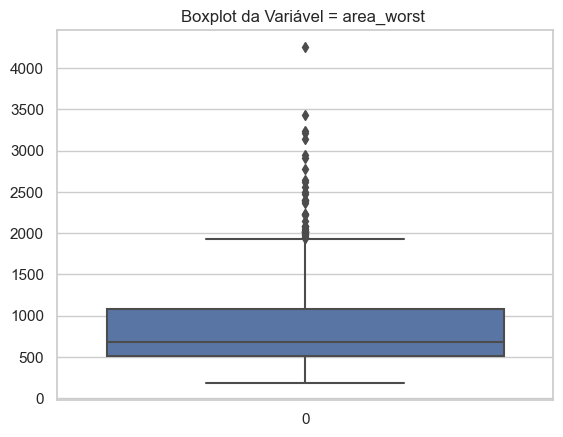

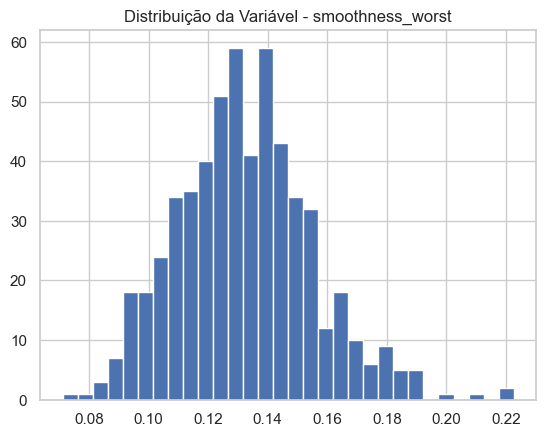

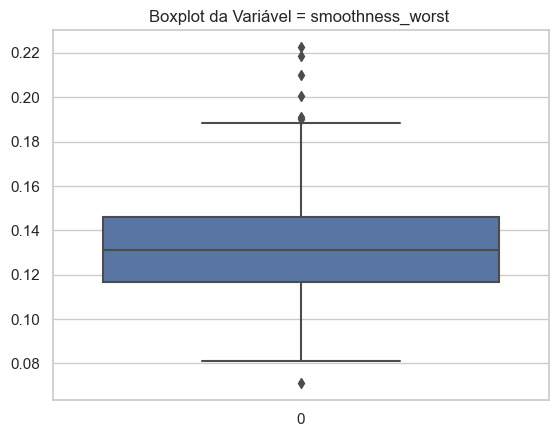

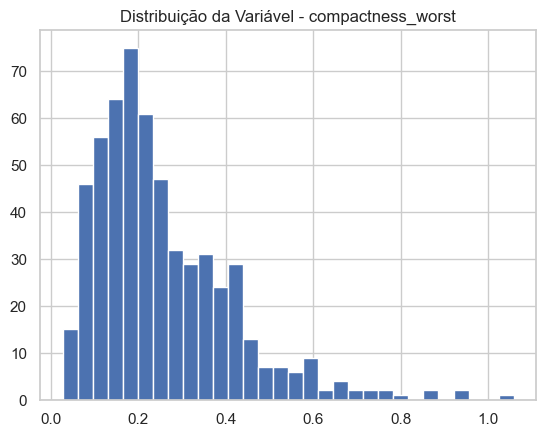

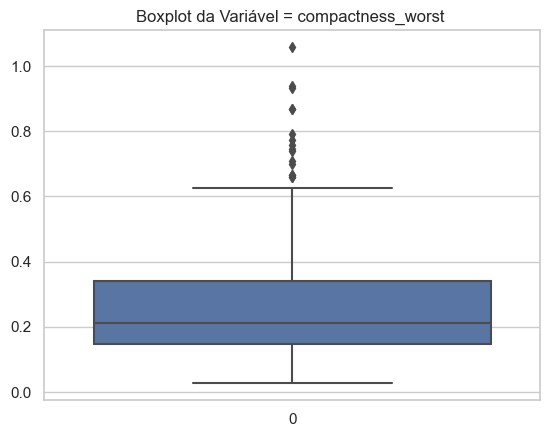

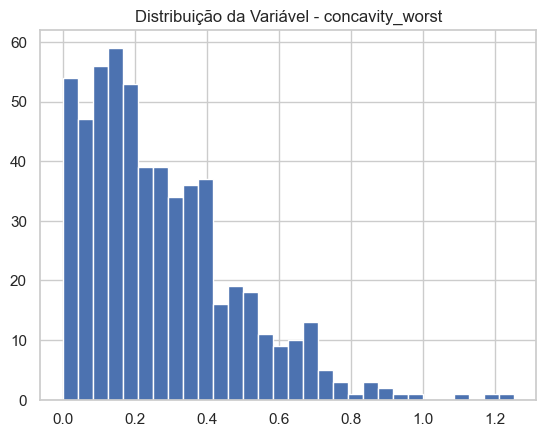

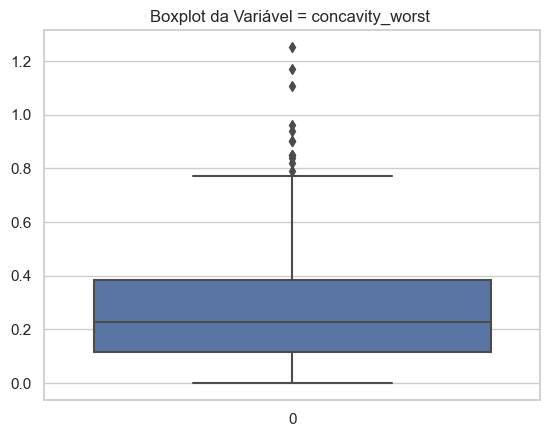

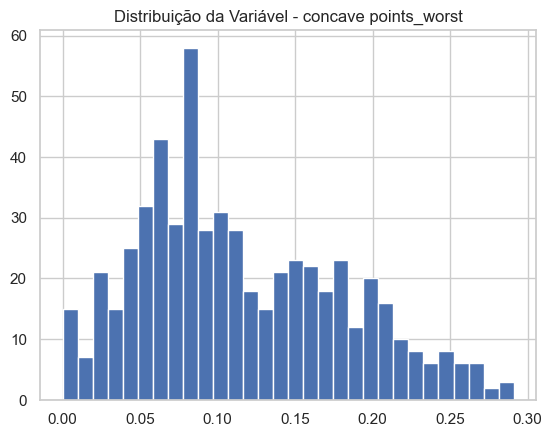

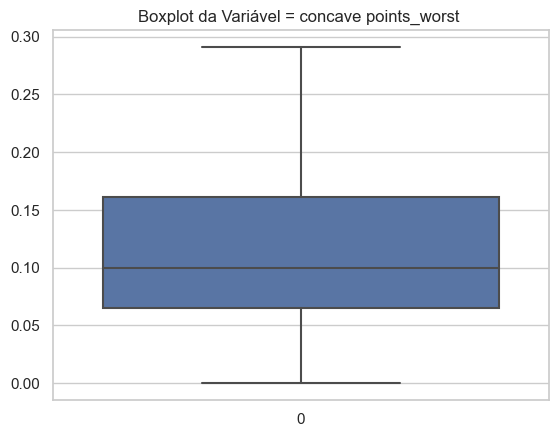

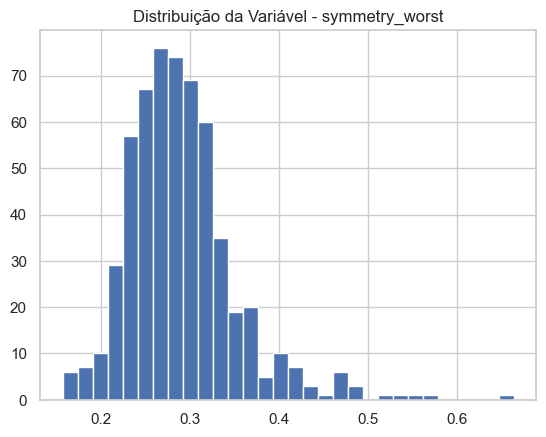

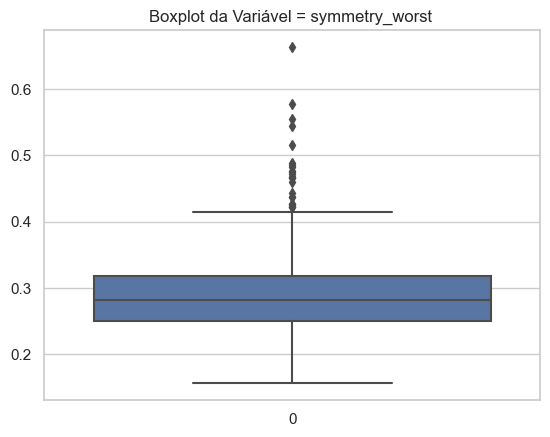

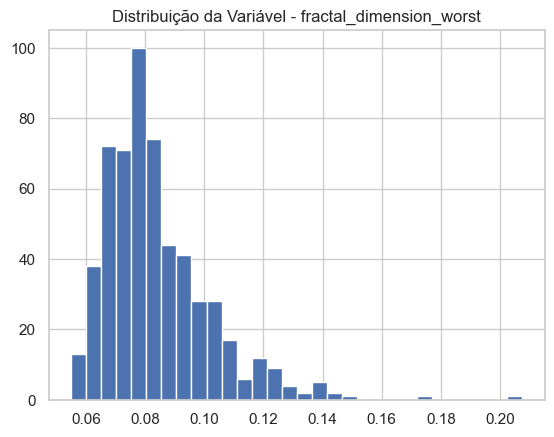

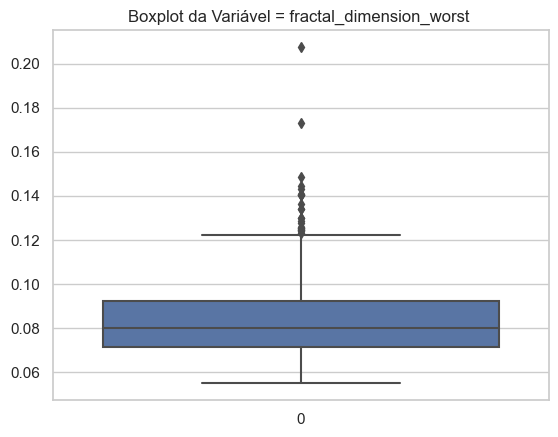

In [43]:
df = pd.read_csv(file_path)
df.drop('Unnamed: 32', axis=1, inplace=True)
df_menos_id = df.drop(['id', 'diagnosis'], axis=1)

for coluna in df_menos_id.columns:
  # Histograma de uma variável numérica
  df_menos_id[coluna].hist(bins=30)
  plt.title(f'Distribuição da Variável - {coluna}')
  plt.show()

  # Boxplot para identificar outliers
  sns.boxplot(data=df[coluna])
  plt.title(f'Boxplot da Variável = {coluna} ')
  plt.show()

### **Separando X e y**

### Matriz de correlação

In [44]:
# Separar as variáveis independentes (atributos) - removendo 'diagnosis' mas mantendo os atributos
X = df.drop(['diagnosis', 'id'], axis=1)
# Separar a variável dependente (alvo/meta)
y = df['diagnosis']  # Esta é a função meta que queremos prever

# Calculando a matriz de correlação para os dados X
correlation_matrix_X = X.corr()

# Exporta a matriz de correlação para um arquivo Excel
correlation_matrix_X.to_excel('correlation_matrix_X.xlsx', index=True)  # Mantendo o índice para referência das variáveis
print("=" * 100)

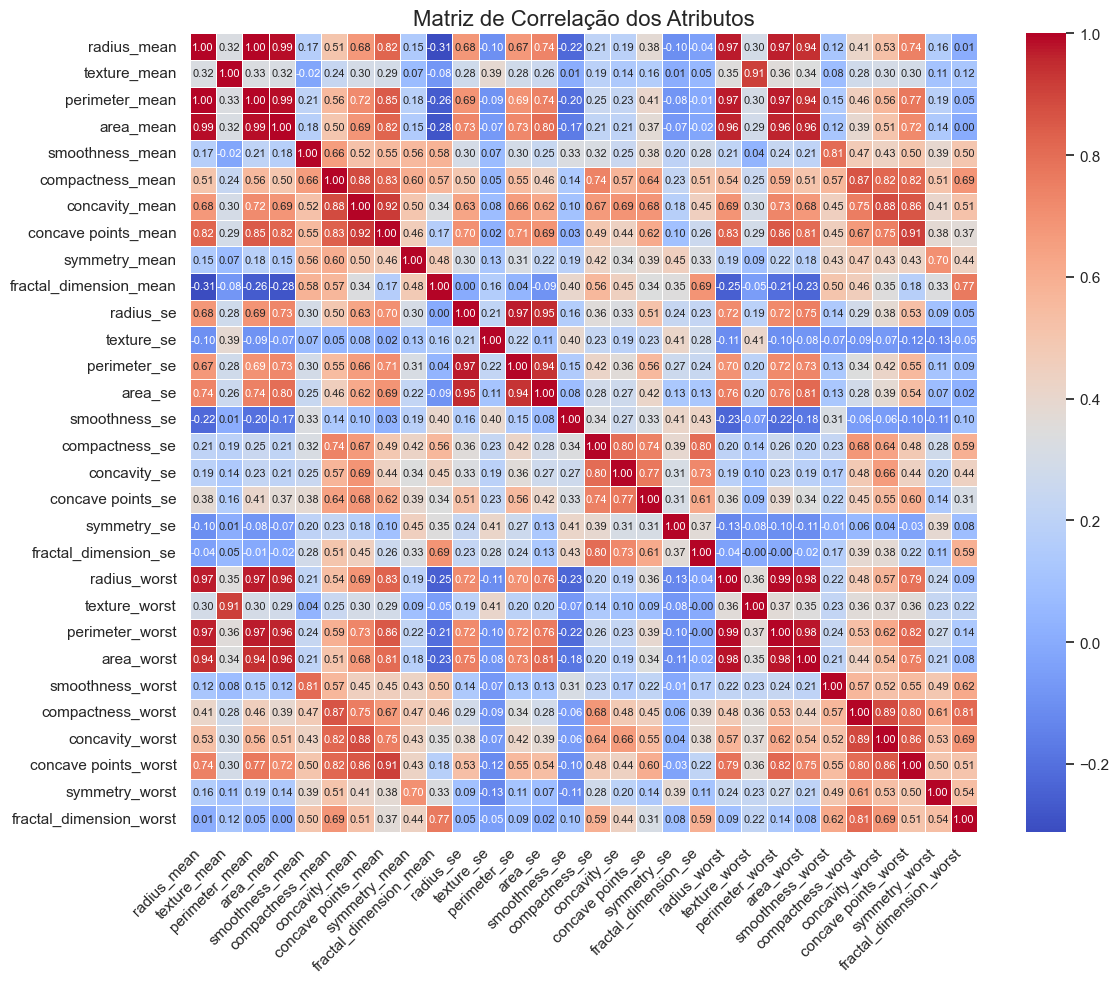

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separar as variáveis independentes (atributos) - removendo 'diagnosis' e 'id'
X = df.drop(['diagnosis', 'id'], axis=1)

# Calcular a matriz de correlação para os dados X
correlation_matrix_X = X.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))  # Aumentar o tamanho do gráfico, se necessário

# Gerar o mapa de calor com tamanho da fonte dos números ajustado
sns.heatmap(
    correlation_matrix_X, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    annot_kws={"size": 8}  # Ajustar o tamanho da fonte dos números
)

# Definir título e ajustar visual
plt.title('Matriz de Correlação dos Atributos', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

# Mostrar o gráfico
plt.show()

In [46]:
# Separar as variáveis independentes (atributos) - removendo 'diagnosis' mas mantendo os atributos
'''Retirando variáveis que possuem alta correlação(>0,9) com:
1)'radius_mean'==('perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst');
2)'texture_mean'==('texture_worst'); NÃO GEROU BOM RESULTADO
3)'concavity_mean' ==('concave points_mean') NÃO GEROU BOM RESULTADO
4)'radius_se'==('perimeter_se','area_se')
'''

#X = df.drop(['diagnosis', 'id'], axis=1)  # Acurácia: 0.9649
#X = df.drop(['diagnosis', 'id','perimeter_mean'], axis=1) # Acurácia: 0.9591
#X = df.drop(['diagnosis', 'id','perimeter_mean','area_mean','perimeter_worst'], axis=1)  # Acurácia: 0.9649
X = df.drop(['diagnosis', 'id','perimeter_mean','area_mean','perimeter_worst','area_worst'], axis=1) # Acurácia: 0.9708
#X = df.drop(['diagnosis', 'id','radius_se'], axis=1) #
#X = df.drop(['diagnosis', 'id','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','texture_worst','concave points_mean','perimeter_se','area_se'], axis=1)

# Separar a variável dependente (alvo/meta)
y = df['diagnosis']  # Esta é a função meta que queremos prever

### Cálculo das distâncias de Mahalanobis para outliers multivariados(aplicado a X)

A distância de Mahalanobis também deve ser calculada apenas nas variáveis independentes X, já que a função meta y (diagnosis) não deve ser incluída esses cálculos.

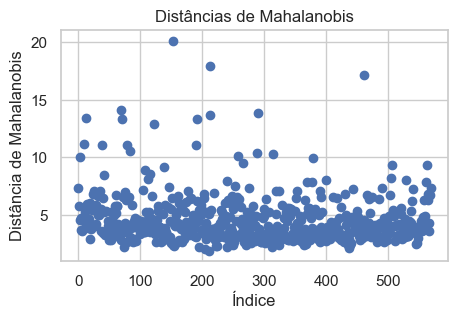

Outliers multivariados encontrados nos índices: (array([  9,  12,  68,  71, 122, 152, 190, 192, 212, 213, 290, 461],
      dtype=int64),)


In [47]:
# Calcular a matriz de covariância para X
cov_matrix = np.cov(X.values.T)
cov_inv = np.linalg.inv(cov_matrix)

# Calcular a média para X
mean = X.mean().values

# Calcular as distâncias de Mahalanobis
dist_mahalanobis = []
for i in range(len(X)):
    dist = mahalanobis(X.values[i], mean, cov_inv)
    dist_mahalanobis.append(dist)

# Plotar as distâncias de Mahalanobis
plt.figure(figsize=(5, 3))
plt.plot(dist_mahalanobis, 'o')
plt.title('Distâncias de Mahalanobis')
plt.xlabel('Índice')
plt.ylabel('Distância de Mahalanobis')
plt.show()

# Verificar valores excepcionais (outliers)
threshold = np.percentile(dist_mahalanobis, 98)  # Exemplo: Limiar no 95º percentil
outliers_mahalanobis = np.where(np.array(dist_mahalanobis) > threshold)
print(f'Outliers multivariados encontrados nos índices: {outliers_mahalanobis}')

Teste removendo os outliers

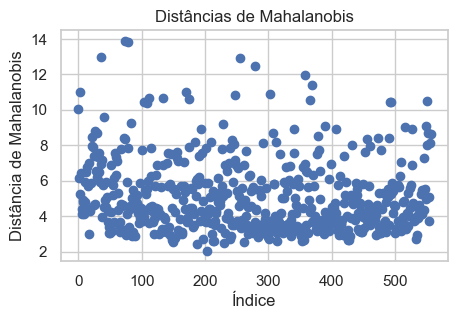

Outliers multivariados encontrados nos índices: (array([  3,  36,  74,  79, 133, 170, 248, 255, 278, 303, 357, 368],
      dtype=int64),)


In [48]:
# Separar as variáveis independentes (atributos) - removendo 'diagnosis' mas mantendo os atributos
df1 = df.drop([9,  12,  68,  71, 122, 152, 190, 192, 212, 213, 290, 461], axis=0)

# Separar a variável dependente (alvo/meta)
y1 = df1['diagnosis']  # Esta é a função meta que queremos prever
X1 = df1.drop(['diagnosis', 'id'], axis=1)

# Calcular a matriz de covariância para X
cov_matrix = np.cov(X1.values.T)
cov_inv = np.linalg.inv(cov_matrix)

# Calcular a média para X
mean = X1.mean().values

# Calcular as distâncias de Mahalanobis
dist_mahalanobis = []
for i in range(len(X1)):
    dist = mahalanobis(X1.values[i], mean, cov_inv)
    dist_mahalanobis.append(dist)

# Plotar as distâncias de Mahalanobis
plt.figure(figsize=(5, 3))
plt.plot(dist_mahalanobis, 'o')
plt.title('Distâncias de Mahalanobis')
plt.xlabel('Índice')
plt.ylabel('Distância de Mahalanobis')
plt.show()

# Verificar valores excepcionais (outliers)
threshold = np.percentile(dist_mahalanobis, 98)  # Exemplo: Limiar no 95º percentil
outliers_mahalanobis = np.where(np.array(dist_mahalanobis) > threshold)
print(f'Outliers multivariados encontrados nos índices: {outliers_mahalanobis}')

Normalizar os conjuntos de dados

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(" ############### MIN MAX ##################")
print(df_minmax)

 ############### MIN MAX ##################
     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       0.521037      0.022658         0.593753          0.792037   
1       0.643144      0.272574         0.289880          0.181768   
2       0.601496      0.390260         0.514309          0.431017   
3       0.210090      0.360839         0.811321          0.811361   
4       0.629893      0.156578         0.430351          0.347893   
..           ...           ...              ...               ...   
564     0.690000      0.428813         0.526948          0.296055   
565     0.622320      0.626987         0.407782          0.257714   
566     0.455251      0.621238         0.288165          0.254340   
567     0.644564      0.663510         0.588336          0.790197   
568     0.036869      0.501522         0.000000          0.074351   

     concavity_mean  concave points_mean  symmetry_mean  \
0          0.703140             0.731113       0.686364   
1        

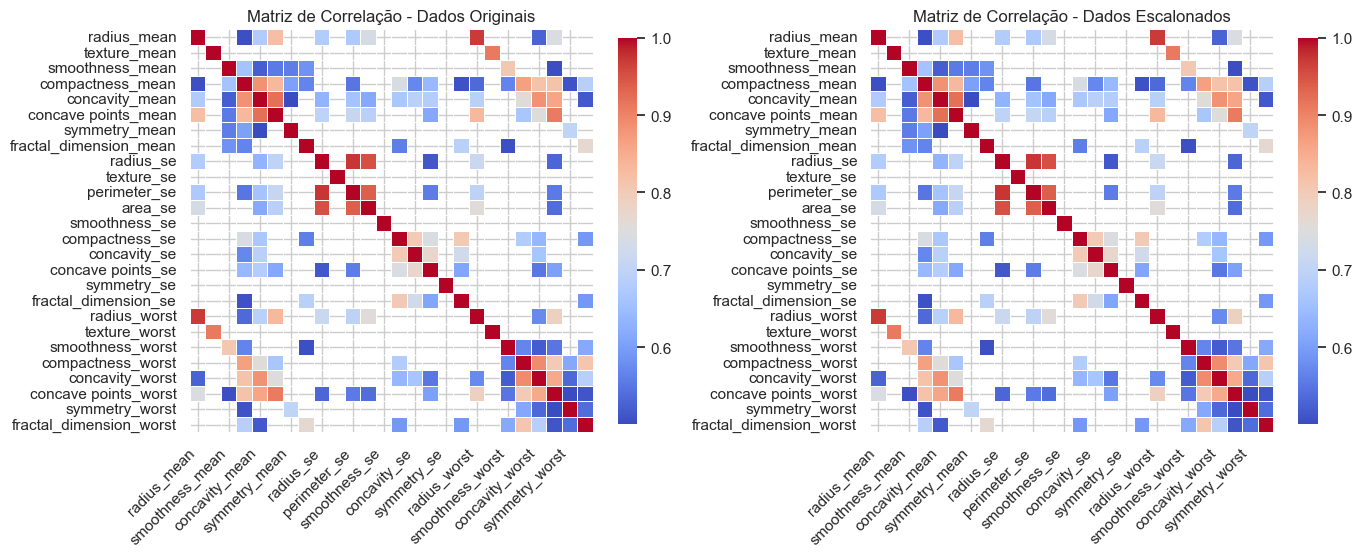

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
correlation_original = X.corr()
correlation_scaled = df_minmax.corr()

# Definir um limite de correlação para mostrar
correlation_threshold = 0.5

# Criar máscara para correlações abaixo do limite
mask_original = abs(correlation_original) < correlation_threshold
mask_scaled = abs(correlation_scaled) < correlation_threshold

# Criar heatmaps para visualização
plt.figure(figsize=(14, 6))

# Heatmap para Dados Originais
plt.subplot(1, 2, 1)
sns.heatmap(correlation_original.where(~mask_original), annot=False, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Matriz de Correlação - Dados Originais')
plt.xticks(rotation=45, ha='right')  # Melhorar legibilidade dos rótulos

# Heatmap para Dados Escalonados
plt.subplot(1, 2, 2)
sns.heatmap(correlation_scaled.where(~mask_scaled), annot=False, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Matriz de Correlação - Dados Escalonados')
plt.xticks(rotation=45, ha='right')  # Melhorar legibilidade dos rótulos

plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Z-Score Normalization
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(" ############### ZSCORE ##################")
print(df_zscore)

 ############### ZSCORE ##################
     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0       1.097064     -2.073335         1.568466          3.283515   
1       1.829821     -0.353632        -0.826962         -0.487072   
2       1.579888      0.456187         0.942210          1.052926   
3      -0.768909      0.253732         3.283553          3.402909   
4       1.750297     -1.151816         0.280372          0.539340   
..           ...           ...              ...               ...   
564     2.110995      0.721473         1.041842          0.219060   
565     1.704854      2.085134         0.102458         -0.017833   
566     0.702284      2.045574        -0.840484         -0.038680   
567     1.838341      2.336457         1.525767          3.272144   
568    -1.808401      1.221792        -3.112085         -1.150752   

     concavity_mean  concave points_mean  symmetry_mean  \
0          2.652874             2.532475       2.217515   
1         

In [52]:
# Utilizando o dataser sem os outliers

# Z-Score Normalization
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)

print(" ############### ZSCORE ##################")
print(df_zscore)

 ############### ZSCORE ##################
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.148749     -2.064384        1.332430   1.063374         1.597126   
1       1.907110     -0.346483        1.763866   2.042622        -0.821626   
2       1.648444      0.462489        1.639988   1.672014         0.964773   
3      -0.782425      0.260246       -0.599208  -0.789363         3.328913   
4       1.824807     -1.143830        1.857842   1.955243         0.296490   
..           ...           ...             ...        ...              ...   
552     2.198109      0.727496        2.152586   2.503621         1.065375   
553     1.777777      2.089729        1.691248   1.846772         0.116844   
554     0.740175      2.050211        0.713041   0.632806        -0.835279   
555     1.915928      2.340789        2.071425   1.858824         1.554011   
556    -1.858239      1.227292       -1.866179  -1.407343        -3.128999   

     compactness_mea

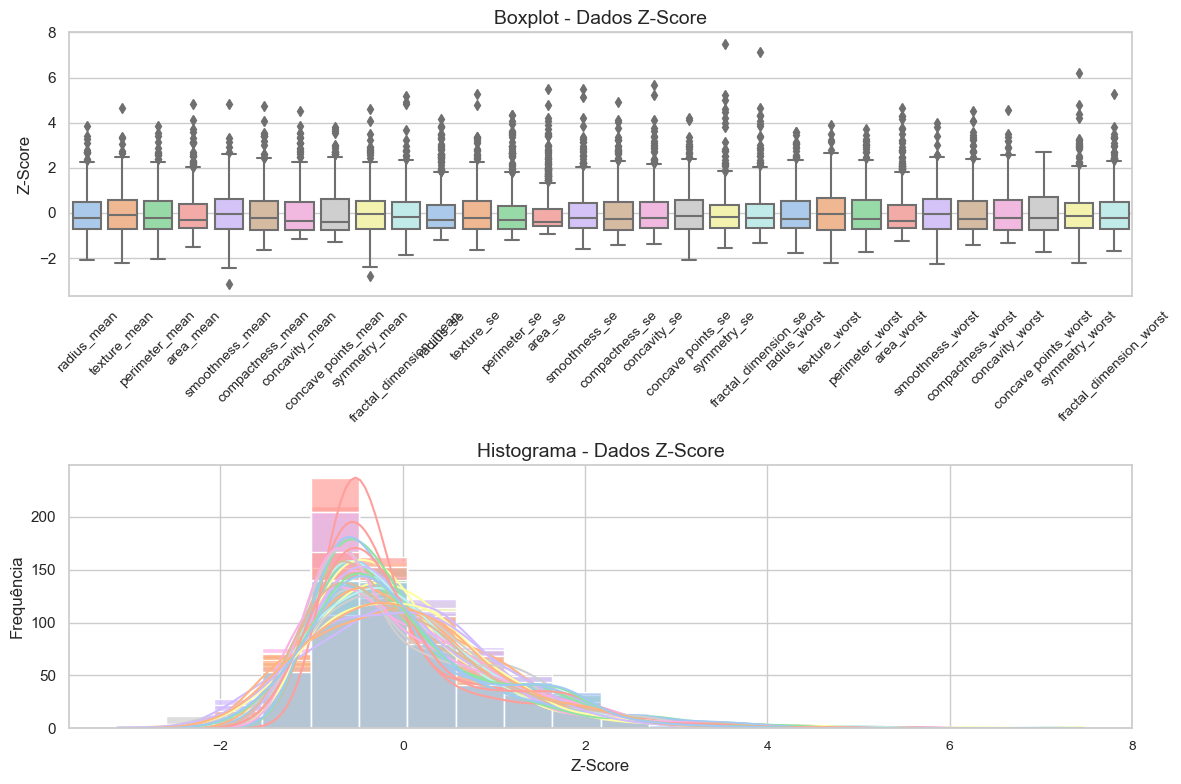

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar uma figura para os gráficos
plt.figure(figsize=(12, 8))

# Boxplot
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
sns.boxplot(data=df_zscore, palette='pastel')
plt.title('Boxplot - Dados Z-Score', fontsize=14)
plt.ylabel('Z-Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Diminuir o tamanho da fonte

# Histograma
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
sns.histplot(df_zscore, bins=20, kde=True, palette='pastel', alpha=0.7, legend=False)  # Diminuir o número de bins e ocultar a legenda
plt.title('Histograma - Dados Z-Score', fontsize=14)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Z-Score', fontsize=12)
plt.xticks(fontsize=10)  # Diminuir o tamanho da fonte

# Ajustar layout
plt.tight_layout()
plt.show()

## Aplicar o Modelo de Machine Learning - Árvore de Decisão

### Dividir o conjunto de dados em treino e teste

In [54]:
############### DATAFRAME COMPLETO ##################"
# rodando com o dataframe completo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

############### DATAFRAME REMOVENDO OUTLIERS ##################
# rodando com o dataframe excluindo os outliers
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

### Criar a árvore de decisão com critério de entropia (similar ao C4.5)

In [55]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Validação Cruzada

In [56]:
from sklearn.model_selection import cross_val_score

# Preparar as features (X) e o target (y)
# X = df.drop(columns=['Id', 'diagnostic'])  # Features
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapeando M para 1 e B para 0


# Realizar a validação cruzada com 5 folds

var_cv = 2
scores = cross_val_score(model, X, y, cv=var_cv, scoring='accuracy')

# Exibir os resultados de cada fold e a média da acurácia
print(f"Acurácia por fold: {scores}")
print(f"Acurácia média: {scores.mean():.2f}")

# Exibir o F1 Score
scores_f1 = cross_val_score(model, X, y, cv=var_cv, scoring='f1')
print(f"F1-Score médio: {scores_f1.mean():.2f}")

# Validação cruzada para Precisão
scores_precision = cross_val_score(model, X, y, cv=var_cv, scoring='precision')
print(f"Precisão média: {scores_precision.mean():.2f}")

# Validação cruzada para recall
scores_recall = cross_val_score(model, X, y, cv=var_cv, scoring='recall')
print(f"Recall médio: {scores_recall.mean():.2f}")

# Gerar o relatório de classificação por classe
#report = classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno'])
#print(report)

Acurácia por fold: [0.92982456 0.92253521]
Acurácia média: 0.93
F1-Score médio: 0.90
Precisão média: 0.88
Recall médio: 0.92


In [57]:
from sklearn.model_selection import cross_val_score

# Preparar as features (X) e o target (y)
# X = df.drop(columns=['Id', 'diagnostic'])  # Features
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapeando M para 1 e B para 0


# Realizar a validação cruzada com 5 folds

var_cv = 4

# Função para exibir as métricas por fold
def print_metrics_per_fold(scores, metric_name):
    print(f"\n{metric_name} por fold:")
    for i, score in enumerate(scores, 1):
        print(f"Dobra {i}: {score:.4f}")
    print(f"{metric_name} média: {scores.mean():.4f}\n")

# Acurácia por fold
scores_accuracy = cross_val_score(model, X, y, cv=var_cv, scoring='accuracy')
print_metrics_per_fold(scores_accuracy, 'Acurácia')

# Precisão por fold
#scores_precision = cross_val_score(model, X, y, cv=var_cv, scoring='precision')
#print_metrics_per_fold(scores_precision, 'Precisão')

# Recall por fold
#scores_recall = cross_val_score(model, X, y, cv=var_cv, scoring='recall')
#print_metrics_per_fold(scores_recall, 'Recall')

# F1-Score por fold
scores_f1 = cross_val_score(model, X, y, cv=var_cv, scoring='f1')
print_metrics_per_fold(scores_f1, 'F1-Score')




Acurácia por fold:
Dobra 1: 0.8741
Dobra 2: 0.8944
Dobra 3: 0.9507
Dobra 4: 0.9507
Acurácia média: 0.9175


F1-Score por fold:
Dobra 1: 0.8393
Dobra 2: 0.8454
Dobra 3: 0.9320
Dobra 4: 0.9369
F1-Score média: 0.8884



      Acurácia  Precisão    Recall  F1-Score
Fold                                        
1     0.874126  0.796610  0.886792  0.839286
2     0.894366  0.931818  0.773585  0.845361
3     0.950704  0.960000  0.905660  0.932039
4     0.950704  0.896552  0.981132  0.936937


<Figure size 1200x600 with 0 Axes>

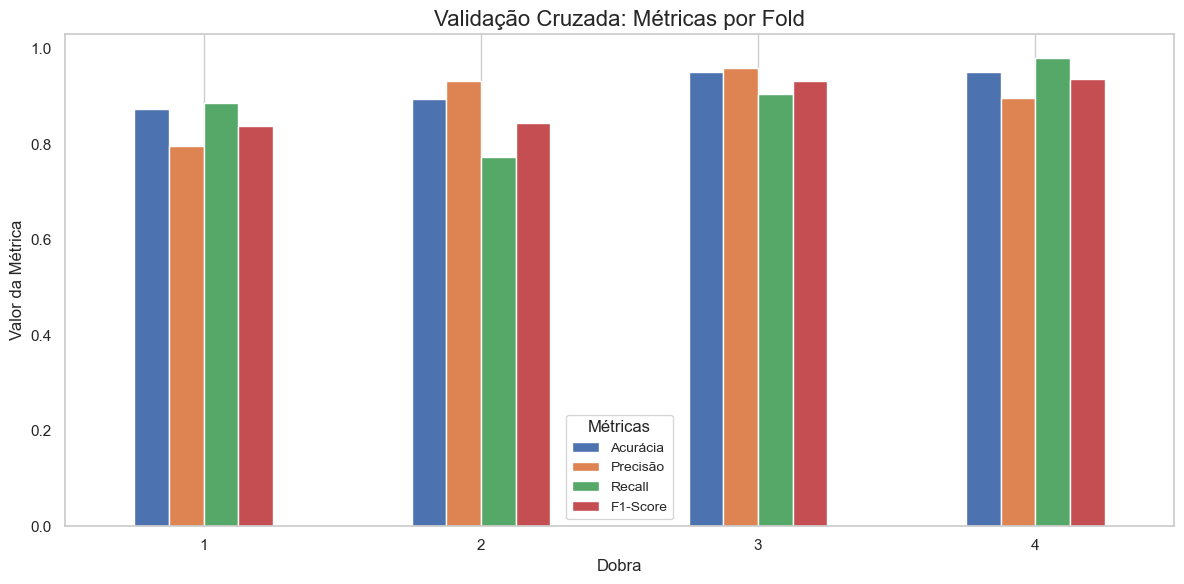

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Separar as variáveis independentes (atributos) - removendo 'diagnosis' mas mantendo os atributos
X = df.drop(['diagnosis', 'id','perimeter_mean','area_mean','perimeter_worst','area_worst'], axis=1) # Acurácia: 0.9708
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Mapeando M para 1 e B para 0

# Realizar a validação cruzada com 5 folds
var_cv = 4

# Função para coletar as métricas em um DataFrame
def get_metrics_per_fold(scores, metric_name):
    metrics = {
        'Fold': range(1, len(scores) + 1),
        metric_name: scores,
    }
    return pd.DataFrame(metrics)

# Coletar as métricas
scores_accuracy = cross_val_score(model, X, y, cv=var_cv, scoring='accuracy')
df_accuracy = get_metrics_per_fold(scores_accuracy, 'Acurácia')

scores_precision = cross_val_score(model, X, y, cv=var_cv, scoring='precision')
df_precision = get_metrics_per_fold(scores_precision, 'Precisão')

scores_recall = cross_val_score(model, X, y, cv=var_cv, scoring='recall')
df_recall = get_metrics_per_fold(scores_recall, 'Recall')

scores_f1 = cross_val_score(model, X, y, cv=var_cv, scoring='f1')
df_f1 = get_metrics_per_fold(scores_f1, 'F1-Score')

# Concatenar todos os resultados em um único DataFrame
df_results = pd.concat([df_accuracy.set_index('Fold'), 
                        df_precision.set_index('Fold'), 
                        df_recall.set_index('Fold'), 
                        df_f1.set_index('Fold')], axis=1)

# Exibir a tabela
print(df_results)

# Gráfico de barras para todas as métricas
plt.figure(figsize=(12, 6))
df_results.plot(kind='bar', figsize=(12, 6))
plt.title('Validação Cruzada: Métricas por Fold', fontsize=16)
plt.xlabel('Dobra', fontsize=12)
plt.ylabel('Valor da Métrica', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Métricas', fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Fazer previsões

In [59]:
y_pred = model.predict(X_test)

### Visualizar a árvore de decisão

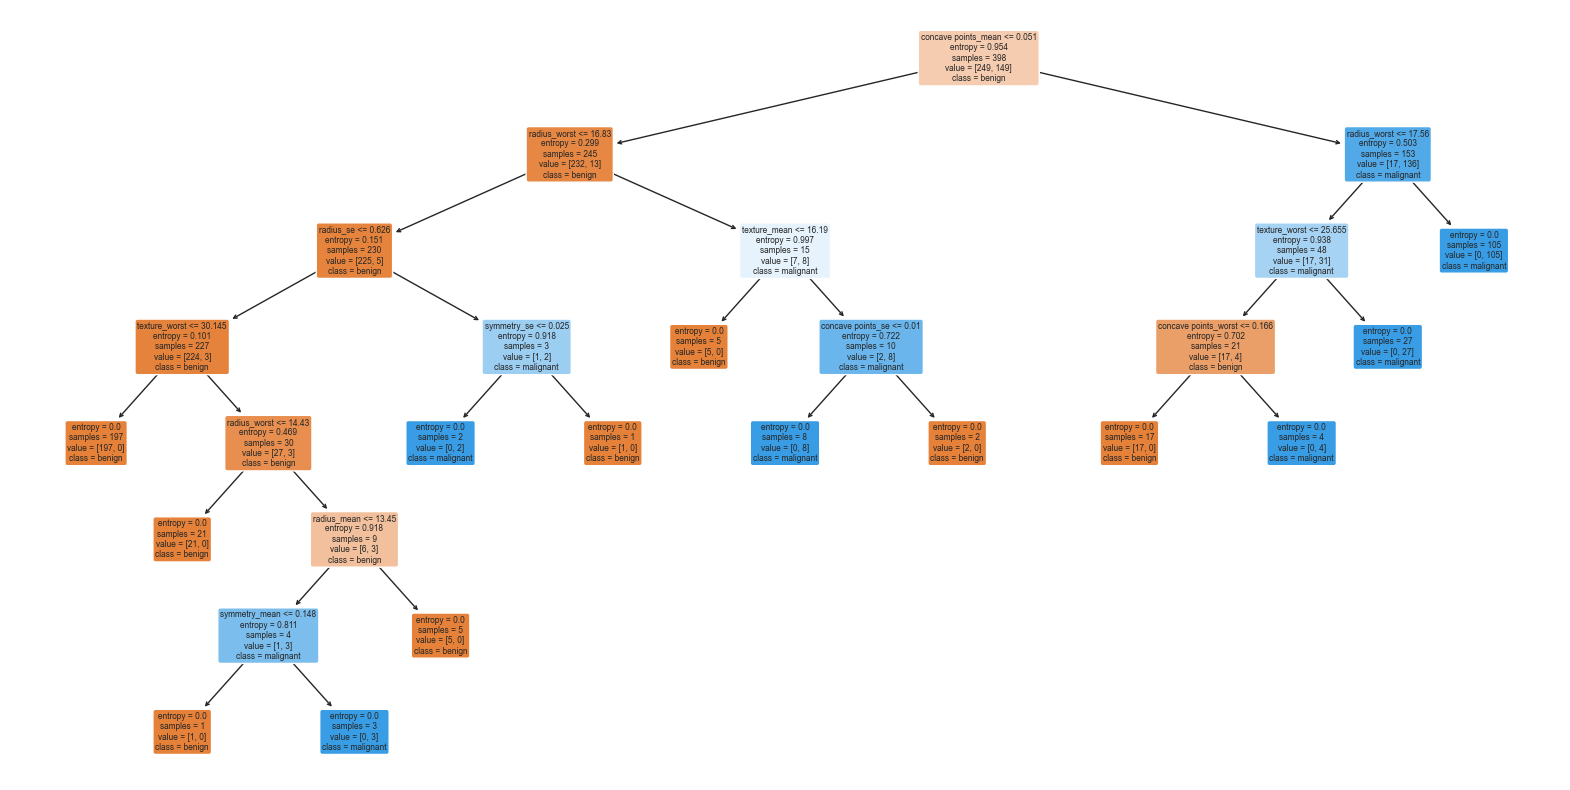

In [60]:
# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando a árvore de decisão
plot_tree(model, feature_names=X.columns, class_names=['benign', 'malignant'],
          filled=True, rounded=True, fontsize=6)

# Exibindo o gráfico
plt.show()

# Resultados
Aqui estão os resultados...

### Medição dos dados

**Avaliação para Modelos de Classificação**

Se o seu modelo é um classificador (como uma Árvore de Decisão ou Regressão Logística), você pode usar as seguintes métricas:

**Métricas e Como Calcular**
1. Acurácia: Proporção de previsões corretas.
2. Matriz de Confusão: Mostra como as previsões se dividem entre verdadeiros e falsos positivos/negativos.
3. Precision, Recall e F1-Score:
* **Precision**: Fração de positivos previstos corretamente.
* **Recall**: Fração de verdadeiros positivos encontrados.
* **F1-Score**: Média harmônica entre Precision e Recal


# Resultados e discussões

<p style='text-align: justify;'>
Os resultados obtidos após a aplicação das diferentes hipóteses e ajustes de parâmetros demonstraram variações significativas nas métricas de desempenho. Com 30% dos dados sendo  destinados para o teste, fizemos  todos os testes subsequentes. Inicialmente com os dados “crus” as métricas de precisão, recall, f1-score e acurácia na classe Maligna foram de 96,72%, 93,65%, 95,16%” e 96,49%,” respectivamente. Esses resultados serviram como base de comparação para as etapas seguintes.
</p>

<p style='text-align: justify;'>
Após implementar a hipótese de redução de dimensionalidade, as métricas apresentaram uma melhora, com precisão atingindo 97%, recall  95%, f1-score 96% e acurácia 97%. Esse aumento reforça a justificativa de exclusão das variáveis com alta correlação, otimizando o modelo sem perda de informações relevantes.
</p>

In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Supondo que você já tem y_test e y_pred
matrix = confusion_matrix(y_test, y_pred)

# Criar DataFrame da matriz de confusão
df_cm = pd.DataFrame(
    matrix,
    columns=["Predito Benigno +", "Predito Maligno -"],
    index=["Real Benigno +", "Real Maligno -"]
)

# Função para estilizar a diagonal e uma célula específica (falsos negativos)
def highlight_diagonal_and_specific(data):
    styles = pd.DataFrame('', index=data.index, columns=data.columns)  # Matriz vazia de estilos
    
    # Pintar a diagonal de azul
    for i in range(len(data)):
        styles.iloc[i, i] = 'background-color: blue; color: white;'  # Diagonal azul
    
    # Pintar a célula (linha 1, coluna 0) de vermelho (falsos negativos)
    styles.iloc[1, 0] = 'background-color: red; color: white;'
    
    return styles

# Aplicar o estilo usando apply com axis=None
styled_df = df_cm.style.apply(highlight_diagonal_and_specific, axis=None)

# Exibir o DataFrame estilizado
display(styled_df)

,Predito Benigno +,Predito Maligno -
Real Benigno +,106,2
Real Maligno -,3,60


In [62]:
# Relatório de Classificação (Precision, Recall e F1-Score)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Curva ROC e AUC
# Supondo que você já tenha o y_test (rótulos reais) e y_pred (previsões)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc:.2f}")

# Plotar Curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Conclusão

<p style='text-align: justify;'>
O estudo confirmou a eficácia de abordagens específicas para otimizar a precisão e robustez do modelo de classificação. A hipótese de redução de dimensionalidade, aplicada por meio da exclusão de variáveis altamente correlacionadas, mostrou-se particularmente vantajosa, resultando em melhorias nas principais métricas, como precisão (97%), recall (95%), f1-score (96%) e acurácia (97%). Esses resultados indicam que a simplificação do conjunto de variáveis pode ser uma estratégia eficaz para evitar redundâncias e melhorar o desempenho do modelo.
</p>
<p style='text-align: justify;'>
A remoção de outliers baseada na métrica de Mahalanobis também foi testada, mas seu impacto foi ruim para o aumento das métricas de interesse. De forma semelhante, a normalização dos dados apresentou um efeito neutro sobre a acurácia e as demais métricas.
Ao variar a proporção do conjunto de teste, observou-se que a divisão de 30% dos dados para teste e o uso do critério de entropia representaram a configuração ideal para maximizar o desempenho. Com essa combinação, o modelo atingiu métricas superiores em comparação com a configuração inicial, validando a eficácia da redução de dimensionalidade na preparação dos dados para o modelo.
</p>
<p style='text-align: justify;'>
Em resumo, os resultados do estudo reforçam que a simplificação cuidadosa das variáveis pode ser essencial para otimizar modelos de classificação, ao passo que a remoção de outliers e a normalização nem sempre são beneficiais consistentes. Esses insights fornecem uma base sólida para estudos futuros, especialmente para aprimorar modelos preditivos em cenários onde a correlação entre variáveis é significativa.
</p>
